# Snap-It 

Authors \
Rachit Agrawal - IMT2020009 \
Vyom Sharma - IMT2020026

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

## Importing Libraries And Dataset

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from tqdm import tqdm
import re
from sklearn.model_selection import train_test_split

main_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

## Exploratory Data Analysis

### Basic Preprocessing

Let us briefly look at the dataset

In [3]:
main_df.head()

,PRODUCT_ID,PRODUCT_NAME,PRODUCT_CONDITION,CATEGORY,PRODUCT_BRAND,SHIPPING_AVAILABILITY,PRODUCT_DESCRIPTION,PRODUCT_PRICE
0,952289,Lipstick queen reserved maiwu,4,Beauty/Makeup/Lips,NaN,0,Lipstick Queen Jean Queen and medieval lipstic...,20.0
1,121903,Garbage Pail Kids blu ray,3,Electronics/Media/Blu-Ray,NaN,1,26Plays great. Tested. Watched once. No scratc...,15.0
2,280534,green floam/slime,1,Kids/Toys/Arts & Crafts,NaN,0,"-6 oz, dragon fruit scented - KEEP OUT OF REAC...",8.0
3,787961,Wallet beige monogram,1,Women/Women's Accessories/Wallets,NaN,0,Wallet brand new never used,31.0
4,479292,Triangle Bike Or Body Blue Light,3,Sports & Outdoors/Outdoors/Other,NaN,0,"Triangle Bike Or Body Blue Light, steady or fl...",8.0


In [4]:
main_df.describe()

,PRODUCT_ID,PRODUCT_CONDITION,SHIPPING_AVAILABILITY,PRODUCT_PRICE
count,1.260154e+06,1.260154e+06,1.260154e+06,1.260154e+06
mean,7.408876e+05,1.907482e+00,4.472382e-01,2.672048e+01
std,4.280136e+05,9.032480e-01,4.972086e-01,3.855894e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.699312e+05,1.000000e+00,0.000000e+00,1.000000e+01
50%,7.408685e+05,2.000000e+00,0.000000e+00,1.700000e+01
75%,1.111356e+06,3.000000e+00,1.000000e+00,2.900000e+01
max,1.482534e+06,5.000000e+00,1.000000e+00,2.009000e+03


Let us check for NaN Values.

In [5]:
(main_df.isna()).sum() 

PRODUCT_ID                    0
PRODUCT_NAME                  0
PRODUCT_CONDITION             0
CATEGORY                   5416
PRODUCT_BRAND            537885
SHIPPING_AVAILABILITY         0
PRODUCT_DESCRIPTION           3
PRODUCT_PRICE                 0
dtype: int64

In [6]:
(test_df.isna()).sum() 

PRODUCT_ID                   0
PRODUCT_NAME                 0
PRODUCT_CONDITION            0
CATEGORY                   911
PRODUCT_BRAND            94797
SHIPPING_AVAILABILITY        0
PRODUCT_DESCRIPTION          1
dtype: int64

Let us replace NaN values with "missing".

In [7]:
main_df["PRODUCT_BRAND"] = main_df['PRODUCT_BRAND'].fillna("missing")
main_df["CATEGORY"] = main_df['CATEGORY'].fillna("missing/missing/missing")
main_df["PRODUCT_DESCRIPTION"] = main_df['PRODUCT_DESCRIPTION'].fillna("missing")
test_df["PRODUCT_BRAND"] = test_df['PRODUCT_BRAND'].fillna("missing")
test_df["CATEGORY"] = test_df['CATEGORY'].fillna("missing/missing/missing")
test_df["PRODUCT_DESCRIPTION"] = test_df['PRODUCT_DESCRIPTION'].fillna("missing")

In [8]:
(main_df.isna()).sum() 

PRODUCT_ID               0
PRODUCT_NAME             0
PRODUCT_CONDITION        0
CATEGORY                 0
PRODUCT_BRAND            0
SHIPPING_AVAILABILITY    0
PRODUCT_DESCRIPTION      0
PRODUCT_PRICE            0
dtype: int64

In [9]:
(test_df.isna()).sum() 

PRODUCT_ID               0
PRODUCT_NAME             0
PRODUCT_CONDITION        0
CATEGORY                 0
PRODUCT_BRAND            0
SHIPPING_AVAILABILITY    0
PRODUCT_DESCRIPTION      0
dtype: int64

Let us check for duplicate rows in the dataset

In [10]:
main_df.index[main_df.duplicated()]

Int64Index([], dtype='int64')

In [11]:
test_df.index[test_df.duplicated()]

Int64Index([], dtype='int64')

There are no duplicate rows in the dataset.

### Analysing Category feature

We first split the categories as general categories and further sub categories.

In [12]:
main_df['CATEGORY'] = main_df['CATEGORY'].str.split("/", n = 5, expand=False)
test_df['CATEGORY'] = test_df['CATEGORY'].str.split("/", n = 5, expand=False)

In [13]:
i = 0 
for x in main_df["CATEGORY"]:
    if len(x) != 3:
        i = i+1
        print(x)
print(i)

['Electronics', 'Computers & Tablets', 'iPad', 'Tablet', 'eBook Access']
['Electronics', 'Computers & Tablets', 'iPad', 'Tablet', 'eBook Readers']
['Electronics', 'Computers & Tablets', 'iPad', 'Tablet', 'eBook Readers']
['Electronics', 'Computers & Tablets', 'iPad', 'Tablet', 'eBook Access']
['Sports & Outdoors', 'Outdoors', 'Indoor', 'Outdoor Games']
['Electronics', 'Computers & Tablets', 'iPad', 'Tablet', 'eBook Readers']
['Sports & Outdoors', 'Outdoors', 'Indoor', 'Outdoor Games']
['Electronics', 'Computers & Tablets', 'iPad', 'Tablet', 'eBook Readers']
['Electronics', 'Computers & Tablets', 'iPad', 'Tablet', 'eBook Access']
['Sports & Outdoors', 'Outdoors', 'Indoor', 'Outdoor Games']
['Sports & Outdoors', 'Exercise', 'Dance', 'Ballet']
['Electronics', 'Computers & Tablets', 'iPad', 'Tablet', 'eBook Readers']
['Electronics', 'Computers & Tablets', 'iPad', 'Tablet', 'eBook Access']
['Electronics', 'Computers & Tablets', 'iPad', 'Tablet', 'eBook Access']
['Electronics', 'Computers & 

We observed that only 3692 (i.e 0.3 percent) rows have more than 3 sub catagories. So, we can ignore them and can consider only 3 catagories for all the rows.

In [14]:
main_df['CATEGORY'] = pd.Series(main_df['CATEGORY'])
test_df['CATEGORY'] = pd.Series(test_df['CATEGORY'])

In [15]:
main_df['CAT1'] = main_df['CATEGORY'].str.get(0).replace('', 'missing').astype('category')
main_df['CAT2'] = main_df['CATEGORY'].str.get(1).fillna('missing').astype('category')
main_df['CAT3'] = main_df['CATEGORY'].str.get(2).fillna('missing').astype('category')
main_df.drop('CATEGORY', axis=1, inplace=True)
test_df['CAT1'] = test_df['CATEGORY'].str.get(0).replace('', 'missing').astype('category')
test_df['CAT2'] = test_df['CATEGORY'].str.get(1).fillna('missing').astype('category')
test_df['CAT3'] = test_df['CATEGORY'].str.get(2).fillna('missing').astype('category')
test_df.drop('CATEGORY', axis=1, inplace=True)

So, the dataset looks as follows after splitting it into 3 diffrent sub catogaries.

In [16]:
main_df.head()

,PRODUCT_ID,PRODUCT_NAME,PRODUCT_CONDITION,PRODUCT_BRAND,SHIPPING_AVAILABILITY,PRODUCT_DESCRIPTION,PRODUCT_PRICE,CAT1,CAT2,CAT3
0,952289,Lipstick queen reserved maiwu,4,missing,0,Lipstick Queen Jean Queen and medieval lipstic...,20.0,Beauty,Makeup,Lips
1,121903,Garbage Pail Kids blu ray,3,missing,1,26Plays great. Tested. Watched once. No scratc...,15.0,Electronics,Media,Blu-Ray
2,280534,green floam/slime,1,missing,0,"-6 oz, dragon fruit scented - KEEP OUT OF REAC...",8.0,Kids,Toys,Arts & Crafts
3,787961,Wallet beige monogram,1,missing,0,Wallet brand new never used,31.0,Women,Women's Accessories,Wallets
4,479292,Triangle Bike Or Body Blue Light,3,missing,0,"Triangle Bike Or Body Blue Light, steady or fl...",8.0,Sports & Outdoors,Outdoors,Other


In [17]:
test_df.head()

,PRODUCT_ID,PRODUCT_NAME,PRODUCT_CONDITION,PRODUCT_BRAND,SHIPPING_AVAILABILITY,PRODUCT_DESCRIPTION,CAT1,CAT2,CAT3
0,777341,F/ship 4 Totoro Washi + 1 pen,1,missing,1,This listing is for all 4 Totoro washi tape fo...,Handmade,Paper Goods,Stationery
1,1463629,UCLA Men's Bundle + Shorts,1,Adidas,1,7 items. 1: XL. 2: 2XL. 3:2XL. 4: XL. 5: 2XL. ...,Women,Other,Other
2,350669,Listing for lol,1,missing,1,- sunglasses and necklace :),Beauty,Makeup,Lips
3,310222,25 pcs kawaii sticker flakes,1,missing,1,I ordered a bunch of stickers so you will reci...,Kids,Toys,Arts & Crafts
4,759257,Chanel Mini Lipgloss Set,2,Chanel,1,Brand new never used authentic Mini Lipgloss g...,Beauty,Makeup,Lips


### Univariate Correlation Analysis

Let us check the correlation between price and product_id

In [18]:
print(np.corrcoef(np.asarray(main_df["PRODUCT_ID"]),np.asarray(main_df["PRODUCT_PRICE"])))

[[1.00000000e+00 9.97514538e-04]
 [9.97514538e-04 1.00000000e+00]]


We can see that the correlation is very less and it is expected. So we can drop the column PRODUCT_ID

In [19]:
main_df = main_df.drop('PRODUCT_ID', axis=1)
test_df = test_df.drop('PRODUCT_ID', axis=1)

Let us check the correlation between price and item condition

<AxesSubplot:xlabel='PRODUCT_CONDITION', ylabel='PRODUCT_PRICE'>

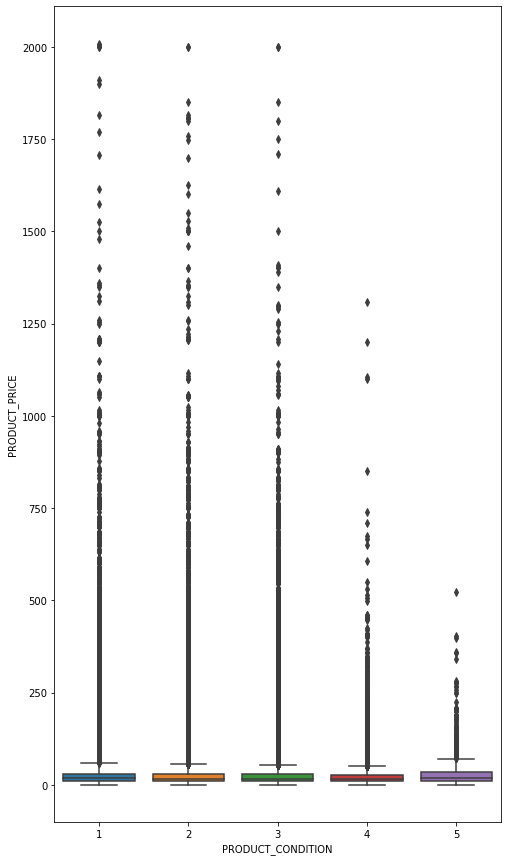

In [20]:
plt.figure(figsize=(8,15))
sns.boxplot(x = main_df["PRODUCT_CONDITION"], y = main_df["PRODUCT_PRICE"])

The median price decreases for product conditions 1 to 4 and slightly increases for product condition 5. Thus, there is a slight change in the price based on item condition. 

Let us check the correlation between price and shipping availability

<AxesSubplot:xlabel='SHIPPING_AVAILABILITY', ylabel='PRODUCT_PRICE'>

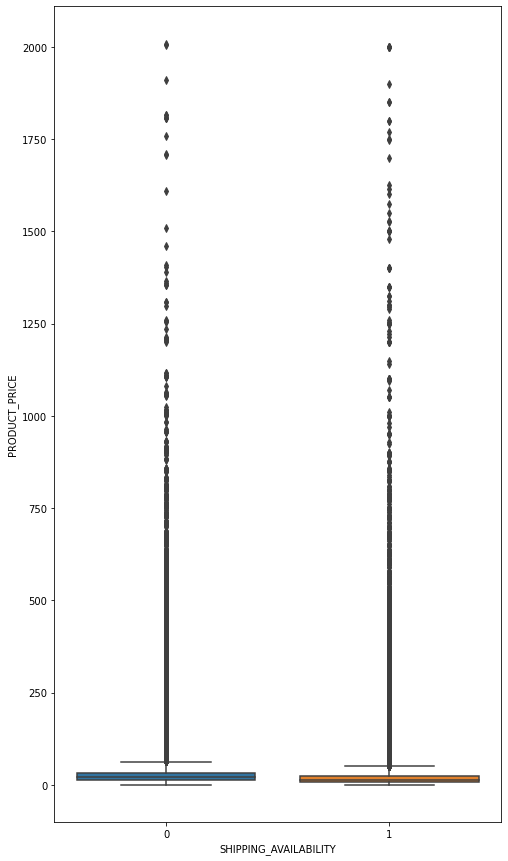

In [21]:
plt.figure(figsize=(8,15))
sns.boxplot(x = main_df["SHIPPING_AVAILABILITY"], y = main_df["PRODUCT_PRICE"])

The median price slightly decreases when shipping availibility is available.

Let us check the correlation between price and CAT1.

<AxesSubplot:xlabel='CAT1', ylabel='PRODUCT_PRICE'>

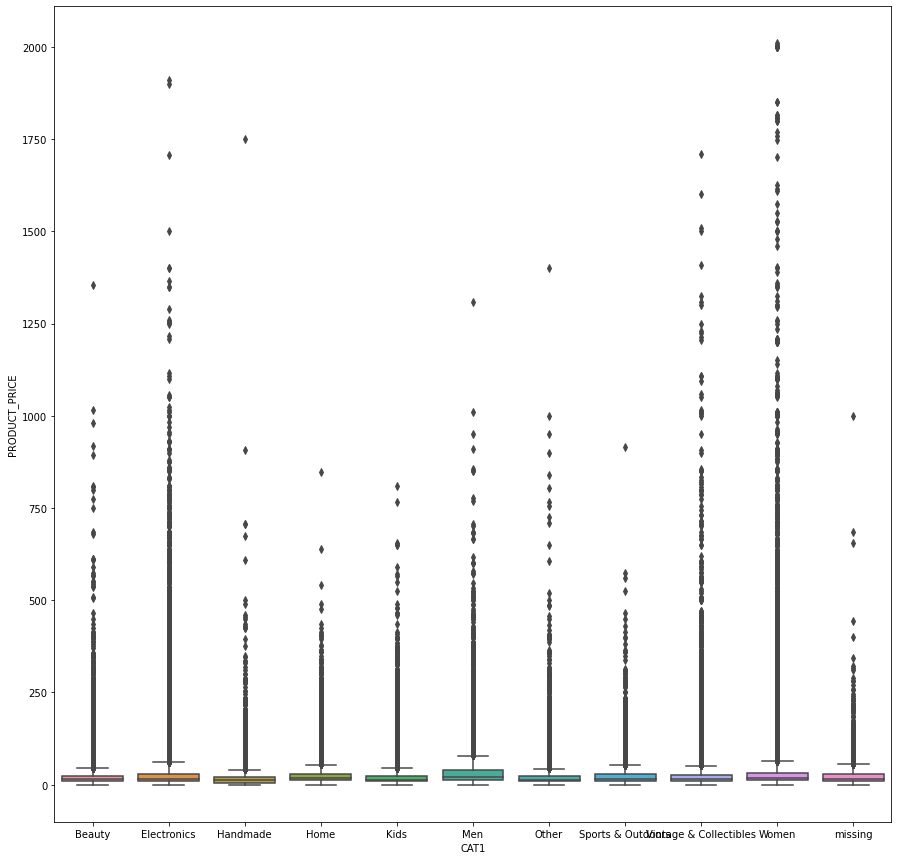

In [22]:
plt.figure(figsize=(15,15))
sns.boxplot(x = main_df["CAT1"], y = main_df["PRODUCT_PRICE"])

There is a change in price depending on the CAT1 feature.\
Let us check the correlation between price and CAT2.

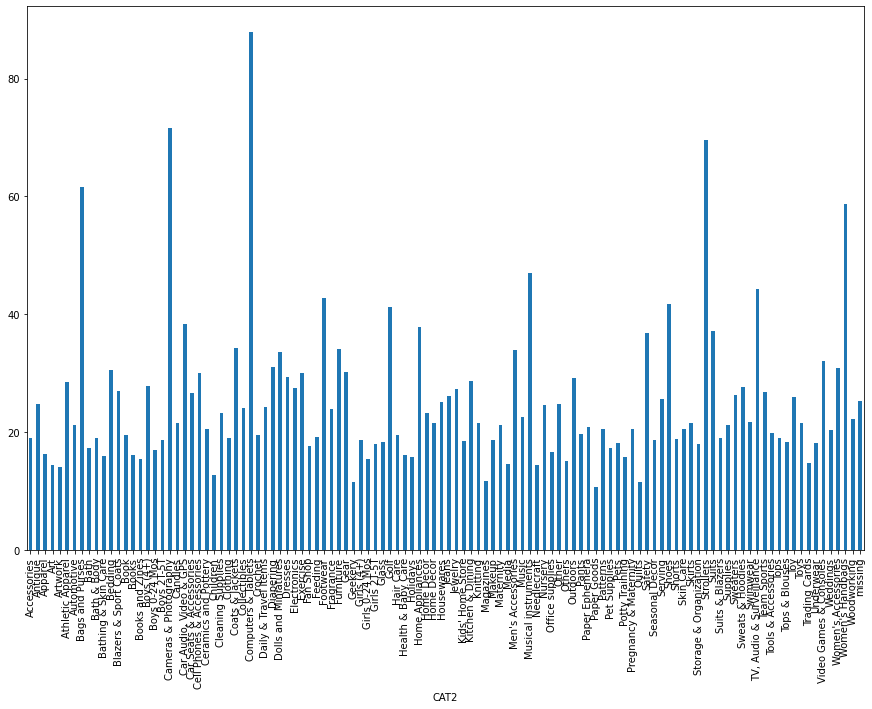

In [23]:
plt.figure(figsize=(15,10))
cat2groupeddf = main_df.groupby("CAT2")["PRODUCT_PRICE"].mean().plot.bar()
plt.show()

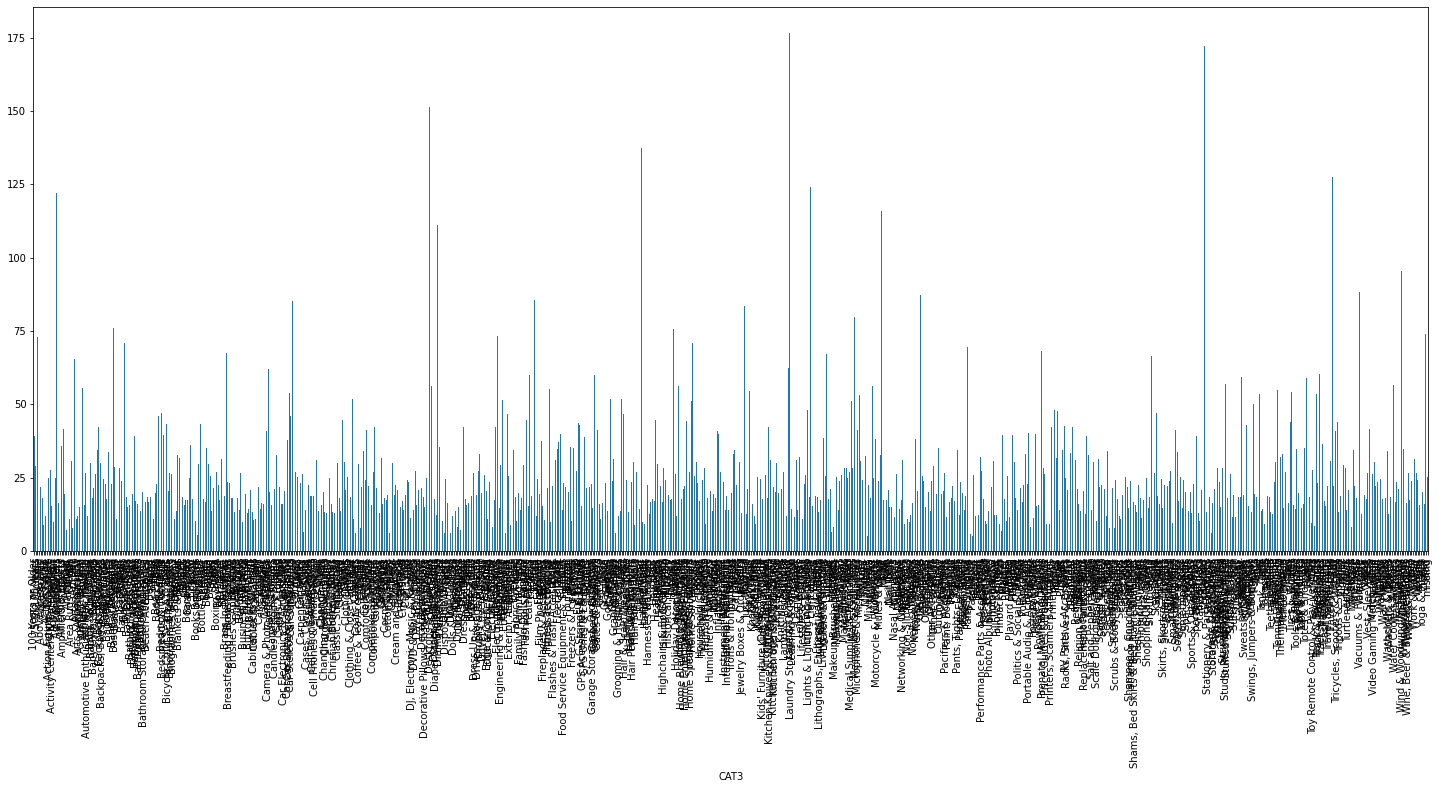

In [24]:
plt.figure(figsize=(25,10))
cat3groupeddf = main_df.groupby("CAT3")["PRODUCT_PRICE"].mean().plot.bar()
plt.show()

We can see there is a difference in the mean of price for each category in CAT2 and CAT3. So category is an important feature for determining the price.\
Let us check the correlation between price and brand 

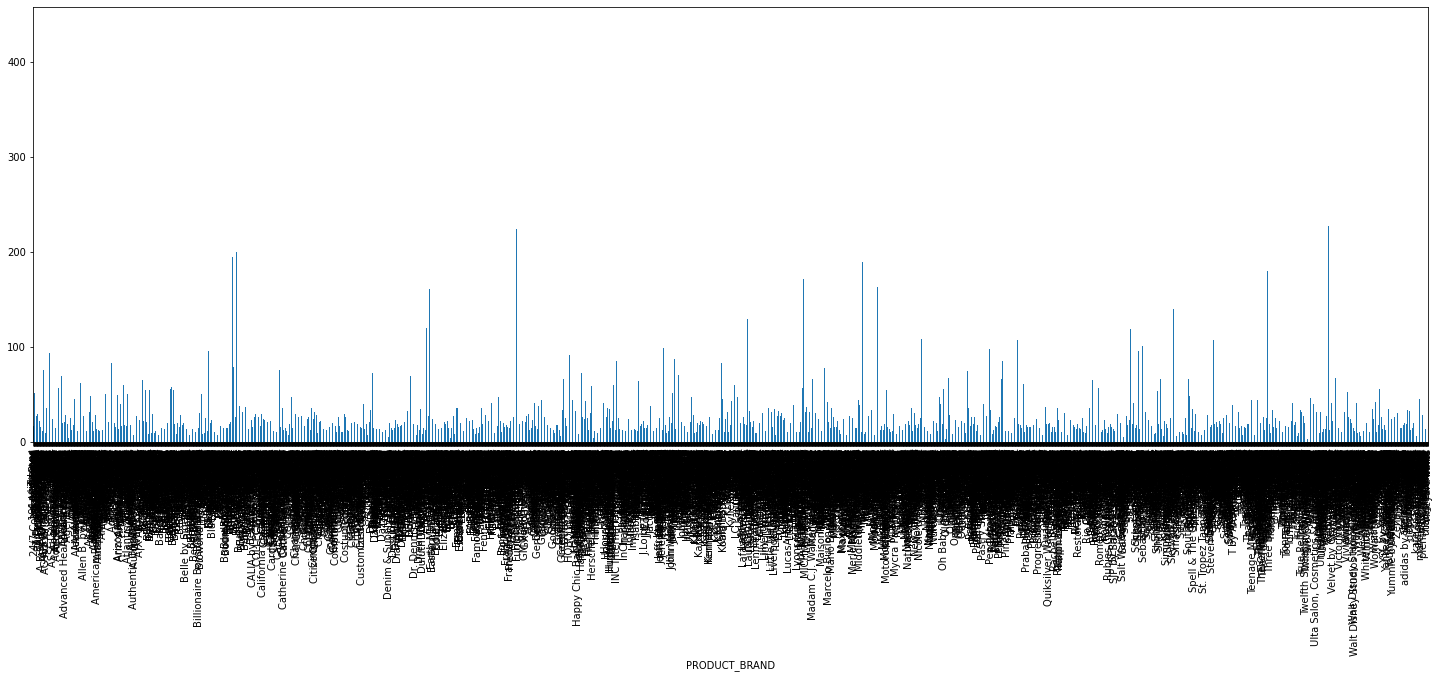

In [25]:
plt.figure(figsize=(25,8))
brandgroupeddf = main_df.groupby("PRODUCT_BRAND")["PRODUCT_PRICE"].mean().plot.bar()
plt.show()

There is a difference in the mean of price for different brands. So brand is also an important feature in determining product price.

In [26]:
for col in main_df:
    print(col, len(main_df[col].unique()))

PRODUCT_NAME 1052486
PRODUCT_CONDITION 5
PRODUCT_BRAND 4633
SHIPPING_AVAILABILITY 2
PRODUCT_DESCRIPTION 1093532
PRODUCT_PRICE 799
CAT1 11
CAT2 114
CAT3 864


### Preprocessing Text

In [27]:
print('Removed {} rows' .format(len(main_df[main_df.PRODUCT_PRICE <=0])))
main_df = main_df[main_df.PRODUCT_PRICE > 0].reset_index(drop=True)

Removed 740 rows


731 rows are present with price less than zero. So, they are invalid rows. Hence, removed from the dataset.

We preprocessed the text of NAME and DESCRIPTION. We removed non-alphanumeric characters, regular expressions, stopwords from the text. 

In [28]:
def PreprocessName(name_col):
    preprocessed_names = []
    for sentence in tqdm(name_col.values):
        s = sentence.replace('\\r', ' ')
        s = s.replace('\\"', ' ')
        s = s.replace('\\n', ' ')
        s = re.sub('[^A-Za-z0-9]+', ' ', s)
        preprocessed_names.append(s.lower().strip())
    return preprocessed_names

In [29]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords = stopwords.words('english')
def PreprocessDescription(desc_col):
    preprocessed_descs = []
    for sentence in tqdm(desc_col.values):
        s = sentence.replace('\\r', ' ')
        s = s.replace('\\"', ' ')
        s = s.replace('\\n', ' ')
        s = re.sub('[^A-Za-z0-9]+', ' ', s)
        s = ' '.join(e for e in s.split() if e not in stopwords)
        preprocessed_descs.append(s.lower().strip())
    return preprocessed_descs

[nltk_data] Downloading package stopwords to /home/vyom/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We preprocessed the text of CATEGORY. We removed blank spaces from the text. 

In [30]:
def PreprocessCategory(cat_col):
    catogories = list(cat_col)

    cat_list = []
    for i in tqdm(catogories):
        i = re.sub('[^A-Za-z0-9]+', ' ', i)
        i = i.replace(' ','')
        cat_list.append(i.strip())
    
    return cat_list 

In [31]:
main_df["PRODUCT_NAME"] = PreprocessName(main_df["PRODUCT_NAME"])
main_df["PRODUCT_DESCRIPTION"] = PreprocessDescription(main_df["PRODUCT_DESCRIPTION"])

test_df["PRODUCT_DESCRIPTION"] = PreprocessDescription(test_df["PRODUCT_DESCRIPTION"])
test_df["PRODUCT_NAME"] = PreprocessName(test_df["PRODUCT_NAME"])

100%|██████████| 222381/222381 [00:00<00:00, 473788.90it/s]


In [32]:
main_df["CAT1"] = PreprocessCategory(main_df["CAT1"])
main_df["CAT2"] = PreprocessCategory(main_df["CAT2"])
main_df["CAT3"] = PreprocessCategory(main_df["CAT3"])

test_df["CAT1"] = PreprocessCategory(test_df["CAT1"])
test_df["CAT2"] = PreprocessCategory(test_df["CAT2"])
test_df["CAT3"] = PreprocessCategory(test_df["CAT3"])


100%|██████████| 222381/222381 [00:00<00:00, 836744.68it/s]


In [33]:
main_df.head()

,PRODUCT_NAME,PRODUCT_CONDITION,PRODUCT_BRAND,SHIPPING_AVAILABILITY,PRODUCT_DESCRIPTION,PRODUCT_PRICE,CAT1,CAT2,CAT3
0,lipstick queen reserved maiwu,4,missing,0,lipstick queen jean queen medieval lipstick us...,20.0,Beauty,Makeup,Lips
1,garbage pail kids blu ray,3,missing,1,26plays great tested watched no scratches,15.0,Electronics,Media,BluRay
2,green floam slime,1,missing,0,6 oz dragon fruit scented keep out of reach of...,8.0,Kids,Toys,ArtsCrafts
3,wallet beige monogram,1,missing,0,wallet brand new never used,31.0,Women,WomensAccessories,Wallets
4,triangle bike or body blue light,3,missing,0,triangle bike or body blue light steady flashi...,8.0,SportsOutdoors,Outdoors,Other


In [34]:
for col in main_df:
    print(col, len(main_df[col].unique()))

PRODUCT_NAME 960753
PRODUCT_CONDITION 5
PRODUCT_BRAND 4630
SHIPPING_AVAILABILITY 2
PRODUCT_DESCRIPTION 1067740
PRODUCT_PRICE 798
CAT1 11
CAT2 114
CAT3 862


The distinct values of NAME, DESCRIPTION AND CATEGORY is reduced after preprocessing text. Let us now split the main_df into train_df and cv_df.

### Splitting Data 

In [35]:
train_df, cv_df = train_test_split(main_df, test_size=0.15, random_state=13)

print('Train size is {} and CV size is {}' .format(train_df.shape, cv_df.shape))

Train size is (1070501, 9) and CV size is (188913, 9)


### One Hot Encoding

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(lowercase=False, binary=True)
train_brand_ohe = vectorizer.fit_transform(train_df['PRODUCT_BRAND'].values)
cv_brand_ohe = vectorizer.transform(cv_df['PRODUCT_BRAND'].values)
test_brand_ohe = vectorizer.transform(test_df['PRODUCT_BRAND'].values)

In [37]:
train_cat1_ohe = vectorizer.fit_transform(train_df['CAT1'].values)
cv_cat1_ohe = vectorizer.transform(cv_df['CAT1'].values)
test_cat1_ohe = vectorizer.transform(test_df['CAT1'].values)

In [38]:
train_cat2_ohe = vectorizer.fit_transform(train_df['CAT2'].values)
cv_cat2_ohe = vectorizer.transform(cv_df['CAT2'].values)
test_cat2_ohe = vectorizer.transform(test_df['CAT2'].values)

In [39]:
train_cat3_ohe = vectorizer.fit_transform(train_df['CAT3'].values)
cv_cat3_ohe = vectorizer.transform(cv_df['CAT3'].values)
test_cat3_ohe = vectorizer.transform(test_df['CAT3'].values)

In [40]:
train_cond_ohe = pd.get_dummies(train_df['PRODUCT_CONDITION'] , prefix='CONDITION')
cv_cond_ohe = pd.get_dummies(cv_df['PRODUCT_CONDITION'] , prefix='CONDITION')
test_cond_ohe = pd.get_dummies(test_df['PRODUCT_CONDITION'] , prefix='CONDITION')

In [41]:
train_ship_ohe = pd.get_dummies(train_df['SHIPPING_AVAILABILITY'] , prefix='SHIPPING_AVAILABILITY')
cv_ship_ohe = pd.get_dummies(cv_df['SHIPPING_AVAILABILITY'] , prefix='SHIPPING_AVAILABILITY')
test_ship_ohe = pd.get_dummies(test_df['SHIPPING_AVAILABILITY'] , prefix='SHIPPING_AVAILABILITY')

### Outliers

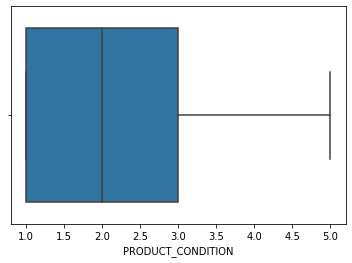

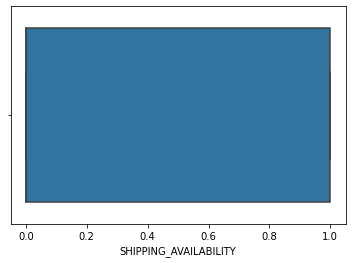

In [42]:
cols = ['PRODUCT_NAME','PRODUCT_DESCRIPTION','PRODUCT_PRICE','PRODUCT_BRAND','CAT1','CAT2','CAT3']
for col in main_df:  
    if col in cols:
        continue
    sns.boxplot(x=main_df[col])
    plt.show()

There are no outliers. We do not need to normalise the data.

### New Dataframe for Neural Networks

In [43]:
train_df_nn = pd.DataFrame()
cv_df_nn = pd.DataFrame()
test_df_nn = pd.DataFrame()

train_df_nn["NAME_BRAND"] = train_df["PRODUCT_NAME"] + " " + train_df["PRODUCT_BRAND"]
cv_df_nn["NAME_BRAND"] = cv_df["PRODUCT_NAME"] + " " + cv_df["PRODUCT_BRAND"]
test_df_nn["NAME_BRAND"] = test_df["PRODUCT_NAME"] + " " + test_df["PRODUCT_BRAND"]

train_df_nn["NAME_DESC_CAT"] = train_df["PRODUCT_NAME"] + " " + train_df["PRODUCT_DESCRIPTION"] + " " + train_df["CAT1"] + " " + train_df["CAT2"] + " " + train_df["CAT3"]
cv_df_nn["NAME_DESC_CAT"] = cv_df["PRODUCT_NAME"] + " " + cv_df["PRODUCT_DESCRIPTION"] + " " + cv_df["CAT1"] + " " + cv_df["CAT2"] + " " + cv_df["CAT3"]
test_df_nn["NAME_DESC_CAT"] = test_df["PRODUCT_NAME"] + " " + test_df["PRODUCT_DESCRIPTION"] + " " + test_df["CAT1"] + " " + test_df["CAT2"] + " " + test_df["CAT3"]

### Dealing with PRODUCT_NAME and PRODUCT_DESCRIPTION

We would be using TF-IDF (term frequency-inverse document frequency) which is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. We would be using 1,2 and 3 grams together. n-gram means using n continuos words as a word and calculating frequencies for it for all the documents. But using 1,2,3 grams together would result in a huge number of words in the dictionary of TF-IDF vectorizer and using all of them would result in very high dimensional vectors. To avoid this, we have limited the number of dimensions to 250k for name and 500k for item_description vectors.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating a TF-IDF vectorizer with 1,2, and 3 ngrams together for PRODUCT_NAME
vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=3, max_features=250000)

tfidf_name = vectorizer.fit_transform(train_df['PRODUCT_NAME'].values)
cv_tfidf_name = vectorizer.transform(cv_df['PRODUCT_NAME'].values)
test_tfidf_name = vectorizer.transform(test_df['PRODUCT_NAME'].values)

# Creating a TF-IDF vectorizer with 1,2, and 3 ngrams together for PRODUCT_DESCRIPTION
vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=5, max_features=500000)

tfidf_description = vectorizer.fit_transform(train_df['PRODUCT_DESCRIPTION'].values)
cv_tfidf_description = vectorizer.transform(cv_df['PRODUCT_DESCRIPTION'].values)
test_tfidf_description = vectorizer.transform(test_df['PRODUCT_DESCRIPTION'].values)

In [ ]:
print(tfidf_name)

### Dealing with NAME_BRAND and NAME_DESC_CAT 

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating a TF-IDF vectorizer with 1 ngram for NAME_BRAND
vectorizer = TfidfVectorizer(ngram_range=(1, 1), min_df=3, max_features=200)

tfidf_name_brand_nn = vectorizer.fit_transform(train_df_nn['NAME_BRAND'].values)
cv_tfidf_name_brand_nn = vectorizer.transform(cv_df_nn['NAME_BRAND'].values)
test_tfidf_name_brand_nn = vectorizer.transform(test_df_nn['NAME_BRAND'].values)

# Creating a TF-IDF vectorizer with 1 and 2 ngrams together for NAME_DESC_CAT
vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=5, max_features=400)

tfidf_desc_cat_nn = vectorizer.fit_transform(train_df_nn['NAME_DESC_CAT'].values)
cv_tfidf_desc_cat_nn = vectorizer.transform(cv_df_nn['NAME_DESC_CAT'].values)
test_tfidf_des_cat_nn = vectorizer.transform(test_df_nn['NAME_DESC_CAT'].values)

##  Combining all Features to a Sparse Matrix

In [ ]:
from scipy.sparse import hstack

# All the categorical features have been stacked with name and description tfid
train_sparse = hstack((train_brand_ohe, train_cat1_ohe, train_cat2_ohe, train_cat3_ohe,
               tfidf_name, tfidf_description)).tocsr()

cv_sparse = hstack((cv_brand_ohe, cv_cat1_ohe, cv_cat2_ohe, cv_cat3_ohe,
               cv_tfidf_name, cv_tfidf_description)).tocsr()

test_sparse = hstack((test_brand_ohe, test_cat1_ohe, test_cat2_ohe, test_cat3_ohe,
               test_tfidf_name, test_tfidf_description)).tocsr()

# The sparse matrices are stacked with numerical features
train_X = hstack((np.reshape(train_df["SHIPPING_AVAILABILITY"].values,(-1,1)), np.reshape(train_df["PRODUCT_CONDITION"].values,(-1,1)), train_sparse)).tocsr()
cv_X = hstack((np.reshape(cv_df["SHIPPING_AVAILABILITY"].values,(-1,1)), np.reshape(cv_df["PRODUCT_CONDITION"].values,(-1,1)), cv_sparse)).tocsr()
test_X = hstack((np.reshape(test_df["SHIPPING_AVAILABILITY"].values,(-1,1)), np.reshape(test_df["PRODUCT_CONDITION"].values,(-1,1)), test_sparse)).tocsr()

print('Train size is {}, CV size is {}, and Test size is {}'.format(train_X.shape, cv_X.shape, test_X.shape))

Train size is (1070501, 755820), CV size is (188913, 755820), and Test size is (222381, 755820)


In [52]:
from scipy.sparse import hstack

# All the categorical features have been stacked with name and description tfid
train_X_nn = hstack((train_cond_ohe, train_ship_ohe, tfidf_name_brand_nn, tfidf_desc_cat_nn)).tocsr()

cv_X_nn = hstack((cv_cond_ohe, cv_ship_ohe, cv_tfidf_name_brand_nn, cv_tfidf_desc_cat_nn)).tocsr()

test_X_nn = hstack((test_cond_ohe, test_ship_ohe, test_tfidf_name_brand_nn, test_tfidf_des_cat_nn)).tocsr()

print('Train size is {}, CV size is {}, and Test size is {}'.format(train_X_nn.shape, cv_X_nn.shape, test_X_nn.shape))

Train size is (1070501, 607), CV size is (188913, 607), and Test size is (222381, 607)


## Training Models

In [53]:
train_Y = np.log1p(train_df["PRODUCT_PRICE"])
cv_Y = np.log1p(cv_df["PRODUCT_PRICE"])

### 1. Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge
from math import sqrt
from sklearn.metrics import mean_squared_error as mse

alpha = [2,2.5,2.8,3,3.5,4,4.5,5] 
errors = [] 
for i in alpha:
    model = Ridge(solver="sag", random_state=13, alpha=i)
    model.fit(train_X, train_Y)
    pred = model.predict(cv_X)
    errors.append(sqrt(mse(cv_Y, pred)))

for i in range(len(errors)):
    print ('Root Mean Squared Logarithmic Error for alpha =',alpha[i],'is',errors[i])
    
alpha_min = np.argmin(errors)

plt.plot(alpha,errors)
plt.title("Cross Validation Error for each alpha")
plt.xlabel("alpha")
plt.ylabel("RMSLE")
plt.show()

In [ ]:
print("Best alpha: ",  alpha[alpha_min])
model = Ridge(solver="sag", random_state=13, alpha=alpha[alpha_min])
model.fit(train_X, train_Y)
ridge_pred_train = model.predict(train_X)
ridge_pred_cv = model.predict(cv_X)
ridge_pred_test = model.predict(test_X)
ridge_pred_test = np.exp(ridge_pred_test)-1

print('Train RMSLE is ', sqrt(mse(train_Y, ridge_pred_train)))

ridge_rmse_cv = sqrt(mse(cv_Y, ridge_pred_cv))
print("Cross validation RMSLE is ", ridge_rmse_cv)

In [ ]:
test_temp = pd.read_csv("/content/drive/MyDrive/test.csv")
d = pd.DataFrame(ridge_pred_test,columns=["PRODUCT_PRICE"],index=None)
d = pd.concat([test_temp["PRODUCT_ID"], d], axis=1, join='inner')
d.to_csv("predictions_ridge_regression.csv")

### Reducing the number of features

Before running the other models, we are going to reduce the number of features by selecting only the top 50000 features from tfidf vectors and categorical one hot encoded vectors because the other models require a large amount of time to run.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

fselect = SelectKBest(f_regression, k=50000)
train_reduced_features = fselect.fit_transform(train_sparse, train_Y)
cv_reduced_features = fselect.transform(cv_sparse)
test_reduced_features = fselect.transform(test_sparse)

train_X_reduced = hstack((np.reshape(train_df["SHIPPING_AVAILABILITY"].values,(-1,1)), np.reshape(train_df["PRODUCT_CONDITION"].values,(-1,1)), train_reduced_features)).tocsr()
cv_X_reduced = hstack((np.reshape(cv_df["SHIPPING_AVAILABILITY"].values,(-1,1)), np.reshape(cv_df["PRODUCT_CONDITION"].values,(-1,1)), cv_reduced_features)).tocsr()
test_X_reduced = hstack((np.reshape(test_df["SHIPPING_AVAILABILITY"].values,(-1,1)), np.reshape(test_df["PRODUCT_CONDITION"].values,(-1,1)), test_reduced_features)).tocsr()

print('Train size is {}, CV size is {}, and Test size is {}'.format(train_X_reduced.shape, cv_X_reduced.shape, test_X_reduced.shape))

Train size is (1070501, 50002), CV size is (188913, 50002), and Test size is (222381, 50002)


### 2. SVM Regression

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Root Mean Squared Logarithmic Error for C = 0.1 is 0.8734750580445656
Root Mean Squared Logarithmic Error for C = 0.2 is 0.7998588953300318
Root Mean Squared Logarithmic Error for C = 0.3 is 0.8141602459579735


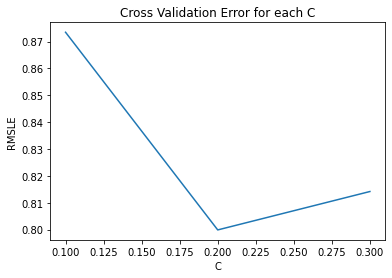

In [ ]:
from sklearn.svm import SVR
from math import sqrt
from sklearn.metrics import mean_squared_error as mse

C = [0.1,0.2,0.3] 
errors = [] 

for i in C:
    model = SVR(C=i, epsilon=0.1, gamma="scale", max_iter=500)
    model.fit(train_X_reduced, train_Y)
    pred = model.predict(cv_X_reduced)
    errors.append(sqrt(mse(cv_Y, pred)))

for i in range(len(errors)):
    print ('Root Mean Squared Logarithmic Error for C =',C[i],'is',errors[i])
    
C_min = np.argmin(errors)

plt.plot(C,errors)
plt.title("Cross Validation Error for each C")
plt.xlabel("C")
plt.ylabel("RMSLE")
plt.show()

In [ ]:
print("Best C: ",  C[C_min])
model = SVR(C=C[C_min], epsilon=0.1, gamma="scale", max_iter=1000)
model.fit(train_X_reduced, train_Y)
svm_pred_train = model.predict(train_X_reduced)
svm_pred_cv = model.predict(cv_X_reduced)
svm_pred_test = model.predict(test_X_reduced)
svm_pred_test = np.exp(svm_pred_test)-1

print('Train RMSLE is ', sqrt(mse(train_Y, svm_pred_train)))

svm_rmse_cv = sqrt(mse(cv_Y, svm_pred_cv))
print("Cross validation RMSLE is ", svm_rmse_cv)

Best C:  0.2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,


Train RMSLE is  0.8112278240458374
Cross validation RMSLE is  0.813714079686291


In [ ]:
test_temp = pd.read_csv("/content/drive/MyDrive/test.csv")
d = pd.DataFrame(svm_pred_test,columns=["PRODUCT_PRICE"],index=None)
d = pd.concat([test_temp["PRODUCT_ID"], d], axis=1, join='inner')
d.to_csv("predictions_svm_regression.csv")

### 3. LightGBM Regression

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform,randint

model = LGBMRegressor(subsample=0.9)

params = {'learning_rate': uniform(0, 1),
          'n_estimators': randint(100, 1500),
          'num_leaves': randint(20, 200),
          'max_depth': randint(2, 15),
          'min_child_weight': uniform(0, 2),
          'colsample_bytree': uniform(0, 1),
         }

lgb_randomized = RandomizedSearchCV(model, param_distributions=params, n_iter=15, cv=4, random_state=13, 
                                scoring='neg_root_mean_squared_error', verbose=10, return_train_score=True)
lgb_randomized = lgb_randomized.fit(train_X_reduced, train_Y)

best_params = lgb_randomized.best_params_
print(best_params)

Fitting 4 folds for each of 15 candidates, totalling 60 fits
[CV 1/4; 1/15] START colsample_bytree=0.7777024105738202, learning_rate=0.2375412200349123, max_depth=8, min_child_weight=1.785965382542449, n_estimators=253, num_leaves=174


In [ ]:
model = LGBMRegressor(**best_params, subsample=0.9, random_state=13, n_jobs=-1)
model.fit(train_X_reduced, train_Y)

lgb_pred_train = model.predict(train_X_reduced)
lgb_pred_cv = model.predict(cv_X_reduced)
lgb_pred_test = model.predict(test_X_reduced)
lgb_pred_test = np.exp(lgb_pred_test)-1

print('Train RMSLE:', sqrt(mse(train_Y, lgb_pred_train)))

lgb_rmsle = sqrt(mse(cv_Y, lgb_pred_cv))
print("Cross validation RMSLE: ", lgb_rmsle)

In [ ]:
d = pd.DataFrame(lgb_pred_test,columns=["PRODUCT_PRICE"],index=None)
d = pd.concat([test_temp["PRODUCT_ID"], d], axis=1, join='inner')
d.to_csv("predictions_lgbm_regression.csv")

### 3. MLP Model

In [54]:
import tensorflow.keras as ks

input = ks.Input(shape=(train_X_nn.shape[1],), dtype='float32', sparse=True)

output = ks.layers.Dense(256, activation='relu')(input)
output = ks.layers.Dense(64, activation='relu')(output)
output = ks.layers.Dense(64, activation='relu')(output)
output = ks.layers.Dense(32, activation='relu')(output)
output = ks.layers.Dense(1)(output)

model = ks.Model(input, output)

In [55]:
model.compile(loss='mean_squared_error', optimizer=ks.optimizers.Adam(lr=3e-3))
for i in range(2):
     model.fit(x=train_X_nn.toarray(), y=train_Y, batch_size=8, epochs=1, verbose=1, validation_data=(cv_X_nn.toarray(), cv_Y))


: 

: 